In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
#path = './data/line_1/20180414/20180414_F_1_L1.I_5209MI.txt'
#path = './data/line_1/20180414/20180414_F_1_L1.I_5209bMI.txt'
path = '../data/line_1/'
file = 'F_1_L1.I_5202F02_2'
fileb = 'F_1_L1.I_5202F02S01'
filec = 'F_1_L1.I_5202F02I'
def loadData(path,file_name):
    alldata = []
    for i in os.listdir('../data/line_1'):
        
        path2 = path + i + '/' + i + '_' + file_name + '.txt'
        print(path)
        f = open(path2) 
        data = json.load(f)
        alldata.extend(data[file_name])
    return alldata

In [2]:
l = loadData(path,file)

../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/


In [3]:
data_l = pd.DataFrame(l)

In [4]:
z_v = loadData(path,fileb)

../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/


In [5]:
z_i = loadData(path,filec)

../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/
../data/line_1/


In [6]:
data_z_v = pd.DataFrame(z_v)
data_z_i = pd.DataFrame(z_i)

In [7]:
data_z_v.head()

,quality,ts,value
0,优,2018-04-14 08:00:00.132,1476.474609
1,优,2018-04-14 08:00:02.345,1536.604492
2,优,2018-04-14 08:00:04.530,1565.660034
3,优,2018-04-14 08:00:06.730,1511.235718
4,优,2018-04-14 08:00:08.929,1464.272949


In [8]:
data_z_i.head()

,quality,ts,value
0,优,2018-04-14 08:00:02.345,98.890442
1,优,2018-04-14 08:00:04.530,93.553368
2,优,2018-04-14 08:00:06.730,94.150269
3,优,2018-04-14 08:00:08.929,97.914314
4,优,2018-04-14 08:00:11.144,100.021057


In [9]:
data_l.value = pd.to_numeric(data_l.value, errors='ignore')
data_z_v.value = pd.to_numeric(data_z_v.value,errors = 'ignore')
data_z_i.value = pd.to_numeric(data_z_i.value,errors = 'ignore')

data_l = data_l[data_l['value']> 0]
data_z_i = data_z_i[data_z_i['value'] > 0]
data_z_v = data_z_v[data_z_v['value'] > 0] 

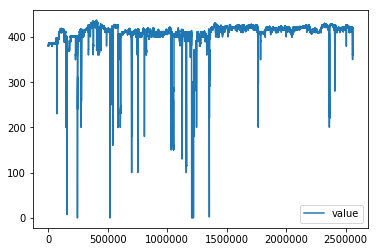

In [10]:
data_l.plot()

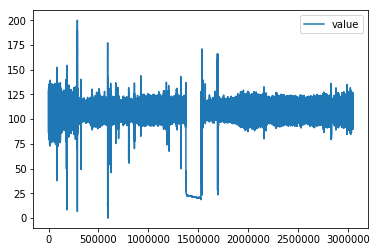

In [11]:
data_z_i.plot()

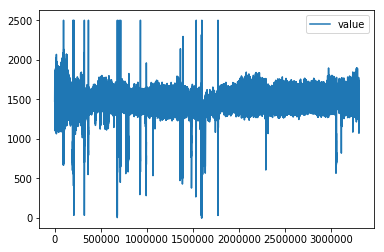

In [12]:
data_z_v.plot()

In [13]:
new_ts_l = [data_l['ts'].iloc[i][0:13] for i in range(0,len(data_l))]
new_ts_z_v = [data_z_v['ts'].iloc[i][0:13] for i in range(0,len(data_z_v))]
new_ts_z_i = [data_z_i['ts'].iloc[i][0:13] for i in range(0,len(data_z_i))]

In [14]:
data_l.drop('ts',axis=1, inplace=True)
data_z_i.drop('ts',axis=1, inplace=True)
data_z_v.drop('ts',axis=1, inplace=True)

In [15]:
data_l.insert(1,'ts',new_ts_l)
data_z_v.insert(1,'ts',new_ts_z_v)
data_z_i.insert(1,'ts',new_ts_z_i)

In [16]:
grouped_l = data_l['value'].groupby(data_l['ts'])
grouped_z_v = data_z_v['value'].groupby(data_z_v['ts'])
grouped_z_i = data_z_i['value'].groupby(data_z_i['ts']) 

In [17]:
d1 = grouped_l.mean()
d2 = grouped_z_v.mean()
d3 = grouped_z_i.mean()

In [18]:
d1 = pd.DataFrame(d1)
d2 = pd.DataFrame(d2)
d3 = pd.DataFrame(d3)

In [19]:
data_2_3 = pd.merge(d2,d3,left_index= True, right_index=True)

In [20]:
data_all =  pd.merge(d1,data_2_3,left_index= True, right_index=True)

In [21]:
data_all

,value,value_x,value_y
ts,,,
2018-04-14 08,380.708032,1367.631949,107.966218
2018-04-14 09,381.223213,1366.662574,107.920557
2018-04-14 10,385.693365,1379.852585,108.171640
2018-04-14 11,385.703400,1384.990247,107.961438
2018-04-14 12,385.692146,1393.209539,108.024603
2018-04-14 13,385.694467,1389.895341,107.841386
2018-04-14 14,385.705709,1384.733584,108.201135
2018-04-14 15,385.681199,1392.814324,108.045986
2018-04-14 16,385.692206,1390.961967,108.118670


In [22]:
mul = data_all.value_x * data_all.value_y
mul = pd.DataFrame(mul)

In [23]:
data_all.insert(1,'multiply',mul)

In [24]:
data_all['multiply']

ts
2018-04-14 08    147658.049531
2018-04-14 09    147490.986408
2018-04-14 10    149260.916494
2018-04-14 11    149525.539124
2018-04-14 12    150500.907272
2018-04-14 13    149888.240485
2018-04-14 14    149829.745160
2018-04-14 15    150487.996772
2018-04-14 16    150388.957787
2018-04-14 17    149918.936804
2018-04-14 18    150139.526793
2018-04-14 19    150859.046550
2018-04-14 20    150807.517737
2018-04-14 21    149823.638373
2018-04-14 22    150443.481565
2018-04-14 23    150043.434633
2018-04-15 00    150159.218547
2018-04-15 01    150161.394709
2018-04-15 02    149847.755388
2018-04-15 03    149951.194850
2018-04-15 04    149917.841974
2018-04-15 05    149704.367409
2018-04-15 06    149864.972748
2018-04-15 07    149969.684254
2018-04-15 08    149514.160270
2018-04-15 09    149696.177824
2018-04-15 10    148050.942737
2018-04-15 11    148380.933494
2018-04-15 12    149761.769653
2018-04-15 13    149322.057416
                     ...      
2018-07-20 02    163500.600365
2018-

Text(0, 0.5, 'F_1_L23.I_T5202F02_2_mean_value')

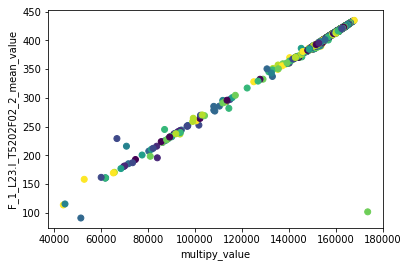

In [25]:
#流量与转速 * 负荷反馈
import numpy as np
c=np.random.randint(0,10,len(data_all))
plt.scatter(data_all['multiply'],data_all['value'],c = c,marker = 'o')
plt.xlabel('multipy_value')
plt.ylabel('F_1_L23.I_T5202F02_2_mean_value')

Text(0, 0.5, 'F_1_L23.I_T5202F02_2_mean_value')

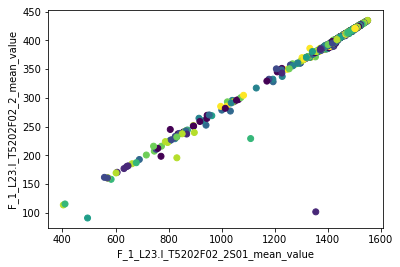

In [26]:
#流量与转速结果反馈
import numpy as np
c=np.random.randint(0,10,len(data_all))
plt.scatter(data_all['value_x'],data_all['value'],c = c,marker = 'o')
plt.xlabel('F_1_L23.I_T5202F02_2S01_mean_value')
plt.ylabel('F_1_L23.I_T5202F02_2_mean_value')

Text(0, 0.5, 'F_1_L23.I_T5202F02_2_mean_value')

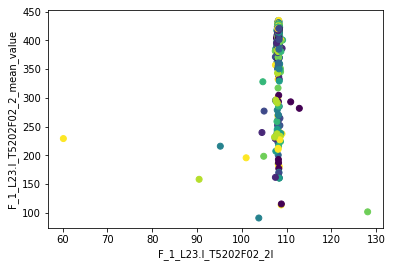

In [27]:
#流量和负荷的反馈
import numpy as np
c=np.random.randint(0,10,len(data_all))
plt.scatter(data_all['value_y'],data_all['value'],c = c,marker = 'o')
plt.xlabel('F_1_L23.I_T5202F02_2I')
plt.ylabel('F_1_L23.I_T5202F02_2_mean_value')